In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargamos el dataset
file_path = 'ensadul2021_l2.csv'
data = pd.read_csv(file_path, sep=';')


In [2]:
# Separamos los folios del dataset para futuras referencias 
# Muy importante mantener el orden 
folios_y_clusters = data[['Folio', 'Folio de integrante']].copy()

# Eliminamos las columnas identificadoras y convertimos las columnas que son numéricas pero están en formato de texto.
data_for_clustering = data.drop(['Folio', 'Folio de integrante'], axis=1)
for col in data_for_clustering.select_dtypes(include=['object']).columns:
    data_for_clustering[col] = pd.to_numeric(data_for_clustering[col], errors='coerce')

# Eliminamos filas con valores NaN resultantes de la conversión
data_for_clustering.dropna(inplace=True)

# Normalizamos los datos.
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_for_clustering)

# Ajustamos el modelo KMeans con 12 clusters
optimal_k = 11
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(normalized_data)

# Obtenemos las etiquetas de clusters
cluster_labels = kmeans_optimal.labels_

# Obtenemos los centroides de cada cluster
cluster_centers = kmeans_optimal.cluster_centers_

(cluster_labels, cluster_centers)


C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


(array([5, 0, 0, ..., 4, 5, 0]),
 array([[-2.43772094e-01, -9.35741307e-02, -4.72865986e-01,
         -9.09099192e-01, -1.55339511e-01, -1.75972900e-01,
         -3.75978683e-02, -2.30855004e-01, -1.05432032e-01,
         -1.16329560e-01,  7.31161921e-02,  1.58946230e-01,
          3.34509414e-01,  7.97803858e-01,  3.31240336e-01,
         -1.91641198e-01,  2.73074440e-01, -2.73074440e-01,
          2.92379281e-01, -2.92379281e-01,  2.76542332e-01,
         -2.69868730e-01, -5.87573145e-02,  4.24426249e-01,
         -4.24426249e-01,  4.19858552e-01, -4.19858552e-01,
          2.25117861e-01, -2.25117861e-01,  2.54705607e-01,
         -2.54705607e-01,  3.05756230e-01, -3.05756230e-01,
          3.40644279e-01, -3.40644279e-01,  3.73115646e-01,
         -3.73115646e-01,  2.98599839e-01, -2.98599839e-01,
         -4.75107266e-01,  5.48983275e-01, -2.17026066e-01,
          2.70959020e-02, -2.70959020e-02, -4.13911386e-01,
          5.54221440e-02,  4.08354021e-01, -4.47571054e-01,
       

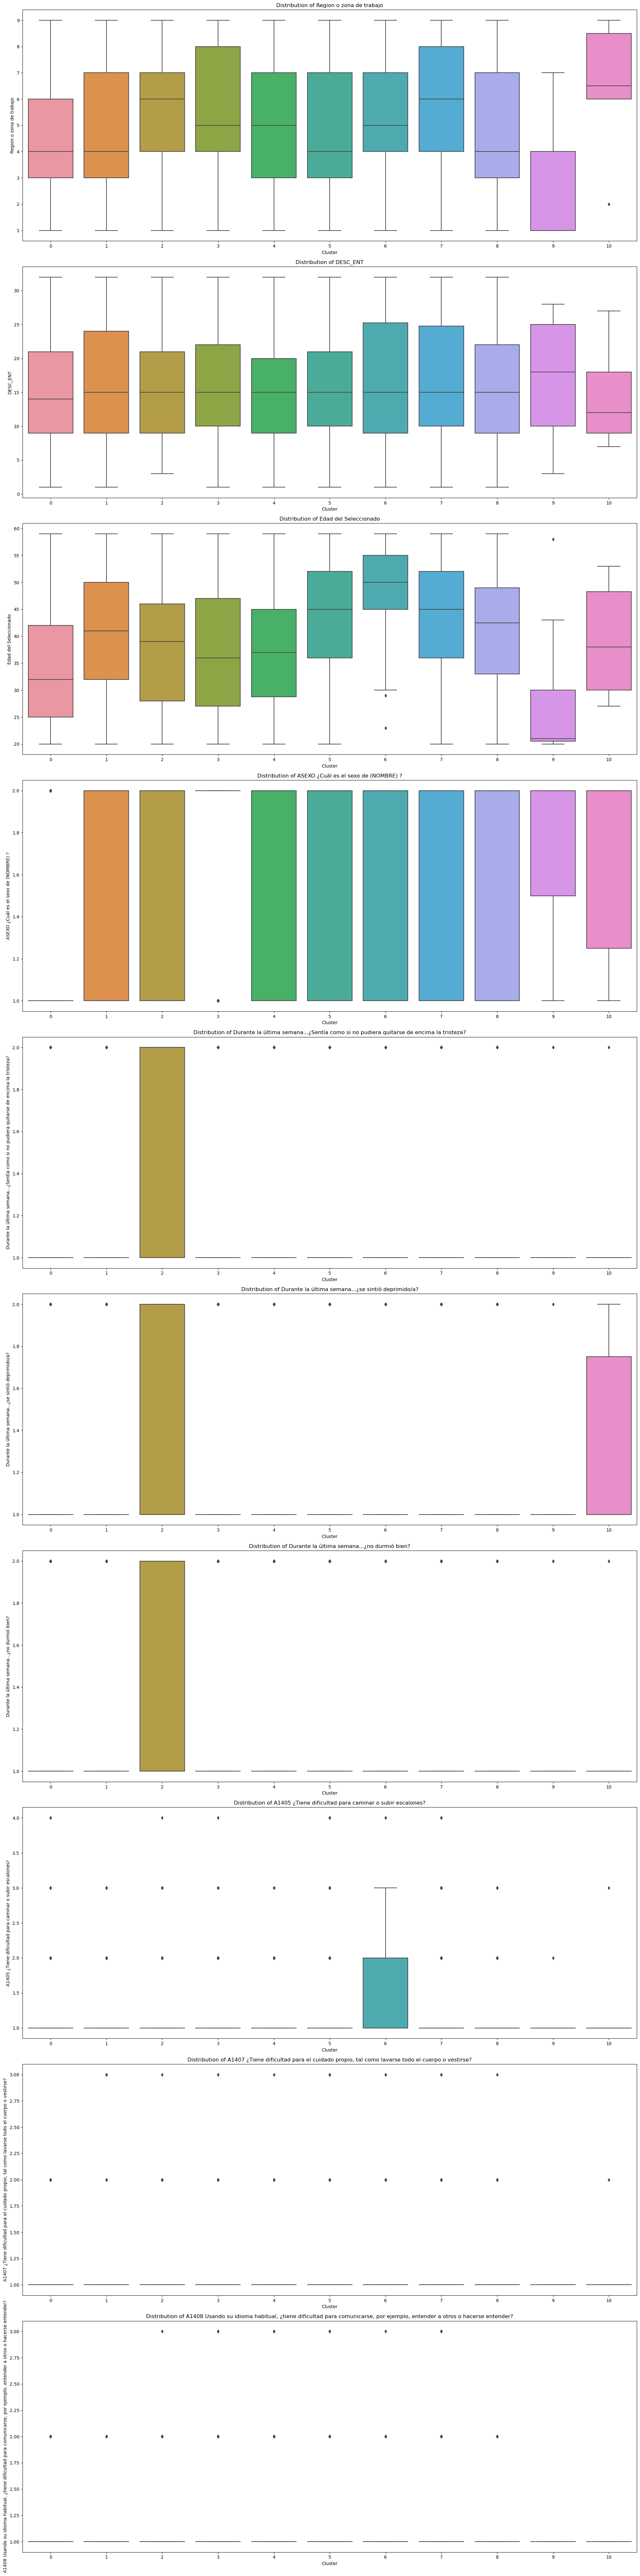

In [3]:
# Importamos librerias necesarias para graficar
import matplotlib.pyplot as plt
import seaborn as sns

# Añadimos las etiquetas de cluster al DataFrame original para el análisis
data_for_analysis = data_for_clustering.copy()
data_for_analysis['Cluster'] = cluster_labels

# Calculamos estadísticas descriptivas para cada cluster
cluster_description = data_for_analysis.groupby('Cluster').describe()

# Visualizamos las distribuciones de las variables para cada cluster usando boxplots
# Debido al gran número de variables, se muestra un ejemplo con una selección de ellas
selected_columns = data_for_analysis.columns[0:10]  # Seleccionamos las primeras 10 columnas como ejemplo

num_columns = len(data_for_analysis.columns[0:10])

# Creamos una figura para contener los boxplots
plt.figure(figsize=(20, num_columns * 8))

# Generamos un boxplot para cada una de las columnas seleccionadas
for i, column in enumerate(selected_columns, 1):
    plt.subplot(num_columns, 1, i )
    sns.boxplot(x='Cluster', y=column, data=data_for_analysis)
    plt.title(f'Distribution of {column}')

# Mostramos los boxplots
plt.tight_layout()
plt.show()


In [4]:

# Mostramos las estadísticas descriptivas de las primeras 10 variables
cluster_description.iloc[:, :10]


Region o zona de trabajo                                               \
                           count      mean       std  min  25%  50%  75%  max   
Cluster                                                                         
0                          963.0  4.527518  2.399762  1.0  3.0  4.0  6.0  9.0   
1                          290.0  4.848276  2.458883  1.0  3.0  4.0  7.0  9.0   
2                          274.0  5.452555  2.486508  1.0  4.0  6.0  7.0  9.0   
3                         1636.0  5.414425  2.662805  1.0  4.0  5.0  8.0  9.0   
4                          504.0  5.039683  2.510101  1.0  3.0  5.0  7.0  9.0   
5                          853.0  4.991794  2.474030  1.0  3.0  4.0  7.0  9.0   
6                          216.0  5.203704  2.440965  1.0  4.0  5.0  7.0  9.0   
7                          766.0  5.702350  2.456986  1.0  4.0  6.0  8.0  9.0   
8                          226.0  4.845133  2.397758  1.0  3.0  4.0  7.0  9.0   
9                           11.0  2.636364  2.248232  1.0  1.0  1.0  4.0  7.0   
10                           6.0  6.500000  2.588436  2.0  6.0  6.5  8.5  9.0   

        DESC_ENT             
           count       mean  
Cluster                      
0          963.0  15.176532  
1          290.0  16.268966  
2          274.0  15.576642  
3         1636.0  16.169927  
4          504.0  15.176587  
5          853.0  15.708089  
6          216.0  17.388889  
7          766.0  16.844648  
8          226.0  15.858407  
9           11.0  16.727273  
10           6.0  14.333333

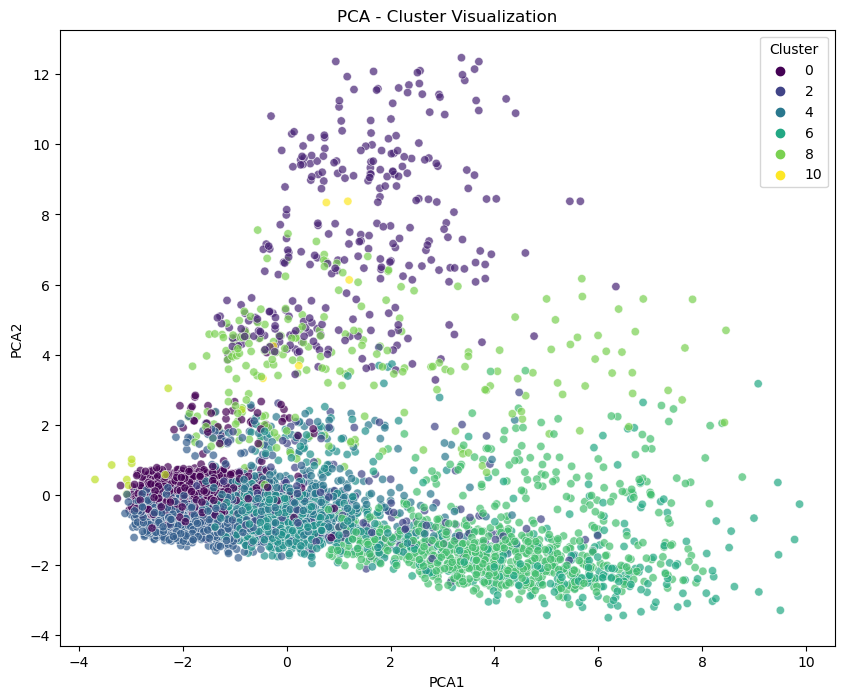

,PCA1,PCA2,PCA1_abs,PCA2_abs
A1005I ¿Qué diagnóstico le dieron?_,-0.047101,-0.363547,0.047101,0.363547
A1005I ¿Qué diagnóstico le dieron?_Bien o Negativo,0.047235,0.361280,0.047235,0.361280
A1001I i) detección de colesterol o triglicéridos altos (examen de sangre)?_SI,0.047209,0.359751,0.047209,0.359751
A1005G ¿Qué diagnóstico le dieron?_Bien o Negativo,0.088741,0.318914,0.088741,0.318914
A1005G ¿Qué diagnóstico le dieron?_,-0.091229,-0.318065,0.091229,0.318065


In [5]:
from sklearn.decomposition import PCA

# Realizamos un análisis de componentes principales para reducir la dimensionalidad
# y visualizar los datos en 2 dimensiones
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)

# Creamos un DataFrame con los resultados del PCA
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

# Graficamos los resultados del PCA con una coloración por cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, alpha=0.7)
plt.title('PCA - Cluster Visualization')
plt.show()

# Para determinar los atributos que más influyen en la formación de cada cluster,
# observamos los vectores propios del PCA y los coeficientes para las dos primeras componentes principales.
pca_components = pd.DataFrame(pca.components_, columns=data_for_clustering.columns, index=['PCA1', 'PCA2']).T
pca_components['PCA1_abs'] = pca_components.PCA1.abs()
pca_components['PCA2_abs'] = pca_components.PCA2.abs()

# Mostramos los atributos que más influyen en cada componente principal
pca_influence = pca_components.sort_values(by='PCA1_abs', ascending=False)
pca_influence.head()  # Mostramos los 5 principales para PCA1
pca_influence.sort_values(by='PCA2_abs', ascending=False).head()  # Mostramos los 5 principales para PCA2


In [6]:
# Guardando el dataset limpio de valores faltantes
data_for_analysis.to_csv('ensadul2021_Clustered.csv',sep=';', index=False)


In [7]:

pca_result


array([[-1.30383966, -0.30093676],
       [-2.18247188, -0.10267366],
       [-1.09593122,  0.51280263],
       ...,
       [-1.27155536, -0.65910159],
       [-0.332226  , -0.13512351],
       [-1.83504467,  0.09846822]])

In [8]:
# Obteniendo centroides
centroides = kmeans_optimal.cluster_centers_

# Convertir los centroides a un DataFrame para mejor visualización
centroides_df = pd.DataFrame(centroides, columns=data_for_clustering.columns)

centroides_df

,Region o zona de trabajo,DESC_ENT,Edad del Seleccionado,ASEXO ¿Cuál es el sexo de (NOMBRE) ?,Durante la última semana...¿Sentía como si no pudiera quitarse de encima la tristeza?,Durante la última semana...¿se sintió deprimido/a?,Durante la última semana...¿no durmió bien?,A1405 ¿Tiene dificultad para caminar o subir escalones?,"A1407 ¿Tiene dificultad para el cuidado propio, tal como lavarse todo el cuerpo o vestirse?","A1408 Usando su idioma habitual, ¿tiene dificultad para comunicarse, por ejemplo, entender a otros o hacerse entender?",...,Region_Frontera,Region_Guanajuato,Region_Pacifico-Norte,Region_Pacífico Sur,Region_Pacífico-Centro,Region_Península,Region_Resto Centro Norte,"INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_aumentó?","INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_disminuyó?","INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_fue igual?"
0,-0.243772,-0.093574,-0.472866,-0.909099,-0.155340,-0.175973,-0.037598,-0.230855,-0.105432,-0.116330,...,0.136254,-0.039475,0.092767,-0.124186,0.091973,-0.193748,0.025083,0.108696,0.034178,-0.121963
1,-0.117603,0.039088,0.114526,0.127882,-0.038092,0.019241,-0.011634,0.031175,0.022225,-0.090281,...,0.084169,-0.046154,0.021572,-0.093440,-0.007943,-0.094037,0.094408,-0.008945,-0.135465,0.096961
2,0.120087,-0.044986,-0.143437,0.016109,0.338424,0.349438,0.236594,0.188179,0.110224,0.150741,...,-0.068579,0.169258,-0.059656,-0.019287,-0.116931,0.077424,-0.105771,0.108230,0.105906,-0.168537
3,0.105089,0.027061,-0.180199,0.338762,-0.067971,-0.040256,-0.065220,-0.186455,-0.085967,-0.061035,...,-0.101488,-0.016892,0.005313,0.072228,0.053816,0.146385,-0.017054,-0.158836,0.020306,0.132188
4,-0.042315,-0.093567,-0.177969,0.099742,0.026852,-0.054872,0.066457,-0.057903,-0.034314,0.115684,...,0.035547,0.019129,0.035143,-0.017109,-0.041920,-0.087563,-0.039811,0.074033,-0.026912,-0.050180
5,-0.061151,-0.029023,0.378664,0.170079,0.104710,0.099670,0.059840,0.154456,0.081757,0.072227,...,0.021588,0.075638,-0.044676,-0.027163,0.060058,-0.024407,0.084051,0.034651,-0.021023,-0.017964
6,0.022202,0.175089,0.907908,0.165040,-0.011008,0.060309,-0.229117,0.687652,0.305526,0.073406,...,0.095805,-0.117693,-0.081467,-0.114424,-0.160301,0.030789,0.123824,0.065160,-0.000038,-0.059662
7,0.218343,0.108998,0.384951,0.073678,0.115494,0.070805,0.070580,0.279802,0.081603,0.105705,...,-0.053782,-0.045982,-0.095358,0.140866,-0.149483,0.071008,-0.088399,0.059160,-0.027204,-0.036365
8,-0.118840,-0.010769,0.190267,-0.042375,-0.042777,0.046345,-0.029869,0.003404,0.097393,-0.071685,...,0.044520,0.097199,0.045591,-0.052131,-0.081507,-0.188535,-0.012088,0.005247,-0.029876,0.014770
9,-0.987649,0.094744,-1.002627,0.156198,0.004323,-0.277903,-0.039968,-0.163076,-0.160440,-0.222537,...,0.089136,-0.064112,1.358932,-0.341494,-0.283719,-0.376422,-0.047445,0.195030,0.206501,-0.313963


In [9]:
# Desnormalizamos los centroides para una mejor lectura
centroides_originales = scaler.inverse_transform(centroides)

# Convertir los centroides desnormalizados a un DataFrame para una mejor visualización
centroides_originales_df = pd.DataFrame(centroides_originales, columns=data_for_clustering.columns)

centroides_originales_df

,Region o zona de trabajo,DESC_ENT,Edad del Seleccionado,ASEXO ¿Cuál es el sexo de (NOMBRE) ?,Durante la última semana...¿Sentía como si no pudiera quitarse de encima la tristeza?,Durante la última semana...¿se sintió deprimido/a?,Durante la última semana...¿no durmió bien?,A1405 ¿Tiene dificultad para caminar o subir escalones?,"A1407 ¿Tiene dificultad para el cuidado propio, tal como lavarse todo el cuerpo o vestirse?","A1408 Usando su idioma habitual, ¿tiene dificultad para comunicarse, por ejemplo, entender a otros o hacerse entender?",...,Region_Frontera,Region_Guanajuato,Region_Pacifico-Norte,Region_Pacífico Sur,Region_Pacífico-Centro,Region_Península,Region_Resto Centro Norte,"INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_aumentó?","INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_disminuyó?","INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_fue igual?"
0,4.527518,15.176532,33.805815,1.220145,1.120457,1.131880,1.182762,1.061267,1.010384,1.024922,...,0.102804,0.098650,1.433022e-01,6.645898e-02,9.865005e-02,6.022845e-02,1.131880e-01,0.325026,0.126687,0.548287
1,4.848276,16.268966,40.444828,1.713793,1.165517,1.210345,1.193103,1.175862,1.034483,1.031034,...,0.089655,0.096552,1.206897e-01,7.586207e-02,7.241379e-02,9.310345e-02,1.344828e-01,0.272414,0.072414,0.655172
2,5.452555,15.576642,37.529197,1.660584,1.310219,1.343066,1.291971,1.244526,1.051095,1.087591,...,0.051095,0.164234,9.489051e-02,9.854015e-02,4.379562e-02,1.496350e-01,7.299270e-02,0.324818,0.149635,0.525547
3,5.414425,16.169927,37.113692,1.814181,1.154034,1.186430,1.171760,1.080685,1.014059,1.037897,...,0.042787,0.105746,1.155257e-01,1.265281e-01,8.863081e-02,1.723716e-01,1.002445e-01,0.205379,0.122249,0.672372
4,5.039683,15.176587,37.138889,1.700397,1.190476,1.180556,1.224206,1.136905,1.023810,1.079365,...,0.077381,0.117063,1.250000e-01,9.920635e-02,6.349206e-02,9.523810e-02,9.325397e-02,0.309524,0.107143,0.583333
5,4.991794,15.708089,43.430246,1.733880,1.220399,1.242673,1.221571,1.229777,1.045721,1.069168,...,0.073857,0.134818,9.964830e-02,9.613130e-02,9.026964e-02,1.160610e-01,1.313013e-01,0.291911,0.109027,0.599062
6,5.203704,17.388889,49.412037,1.731481,1.175926,1.226852,1.106481,1.462963,1.087963,1.069444,...,0.092593,0.074074,8.796296e-02,6.944444e-02,3.240741e-02,1.342593e-01,1.435185e-01,0.305556,0.115741,0.578704
7,5.702350,16.844648,43.501305,1.687990,1.224543,1.231070,1.225849,1.284595,1.045692,1.077023,...,0.054830,0.096606,8.355091e-02,1.475196e-01,3.524804e-02,1.475196e-01,7.832898e-02,0.302872,0.107050,0.590078
8,4.845133,15.858407,41.300885,1.632743,1.163717,1.221239,1.185841,1.163717,1.048673,1.035398,...,0.079646,0.141593,1.283186e-01,8.849558e-02,5.309735e-02,6.194690e-02,1.017699e-01,0.278761,0.106195,0.615044
9,2.636364,16.727273,27.818182,1.727273,1.181818,1.090909,1.181818,1.090909,1.000000,1.000000,...,0.090909,0.090909,5.454545e-01,-2.775558e-17,1.387779e-17,2.775558e-17,9.090909e-02,0.363636,0.181818,0.454545


In [10]:
# Creando un dataframe con los centroides desnormalizados
centroides_originales_df['Cluster'] = range(0, len(centroides_originales_df))



In [11]:
# Guardando la tabla de centroides con los valoes sin normalizar
centroides_originales_df.to_csv('TablaCentroides.csv',sep=';', index=False)


In [12]:
# Obtenemos las etiquetas de los clusters para cada observación
cluster_labels = kmeans_optimal.labels_

# Creamos un DataFrame que contenga los Folios, las etiquetas de cluster 
folios_y_clusters['Cluster'] = cluster_labels



In [13]:
folios_y_clusters

,Folio,Folio de integrante,Cluster
0,2021_01001019,2021_01001019_02,5
1,2021_01001019,2021_01001019_03,0
2,2021_01001021,2021_01001021_02,0
3,2021_01001031,2021_01001031_04,3
4,2021_01001105,2021_01001105_03,4
...,...,...,...
5740,2021_32048033,2021_32048033_01,3
5741,2021_32048034,2021_32048034_01,4
5742,2021_32048045,2021_32048045_01,4
5743,2021_32053017,2021_32053017_01,5


In [14]:
# Guardando la tabla Folios y grupos
folios_y_clusters.to_csv('FoliosyClusters.csv',sep=';', index=False)


In [17]:
# Cargamos el dataset inicial
file_path2 = 'ensadul2021Selcolok.csv'
data_original = pd.read_csv(file_path2, sep=';')

data_original.shape

(5745, 49)

In [18]:
data_original.head

<bound method NDFrame.head of               Folio Folio de integrante Region o zona de trabajo  \
0     2021_01001019    2021_01001019_02             Centro_Norte   
1     2021_01001019    2021_01001019_03             Centro_Norte   
2     2021_01001021    2021_01001021_02             Centro_Norte   
3     2021_01001031    2021_01001031_04             Centro_Norte   
4     2021_01001105    2021_01001105_03             Centro_Norte   
...             ...                 ...                      ...   
5740  2021_32048033    2021_32048033_01             Centro_Norte   
5741  2021_32048034    2021_32048034_01             Centro_Norte   
5742  2021_32048045    2021_32048045_01             Centro_Norte   
5743  2021_32053017    2021_32053017_01             Centro_Norte   
5744  2021_32053020    2021_32053020_01             Centro_Norte   

               DESC_ENT  Edad del Seleccionado  \
0     01 AGUASCALIENTES                     42   
1     01 AGUASCALIENTES                     21   
2  

In [19]:
folios_y_clusters

,Folio,Folio de integrante,Cluster
0,2021_01001019,2021_01001019_02,5
1,2021_01001019,2021_01001019_03,0
2,2021_01001021,2021_01001021_02,0
3,2021_01001031,2021_01001031_04,3
4,2021_01001105,2021_01001105_03,4
...,...,...,...
5740,2021_32048033,2021_32048033_01,3
5741,2021_32048034,2021_32048034_01,4
5742,2021_32048045,2021_32048045_01,4
5743,2021_32053017,2021_32053017_01,5


In [20]:
# Unificamos dataset original y los grupos a traves de los folios
data_combinada = pd.merge(data_original, folios_y_clusters, on=['Folio', 'Folio de integrante'])

# 'data_combinada' ahora contiene tanto los datos originales como la información de clustering
data_combinada.shape

(5745, 50)

In [21]:
data_combinada.head

<bound method NDFrame.head of               Folio Folio de integrante Region o zona de trabajo  \
0     2021_01001019    2021_01001019_02             Centro_Norte   
1     2021_01001019    2021_01001019_03             Centro_Norte   
2     2021_01001021    2021_01001021_02             Centro_Norte   
3     2021_01001031    2021_01001031_04             Centro_Norte   
4     2021_01001105    2021_01001105_03             Centro_Norte   
...             ...                 ...                      ...   
5740  2021_32048033    2021_32048033_01             Centro_Norte   
5741  2021_32048034    2021_32048034_01             Centro_Norte   
5742  2021_32048045    2021_32048045_01             Centro_Norte   
5743  2021_32053017    2021_32053017_01             Centro_Norte   
5744  2021_32053020    2021_32053020_01             Centro_Norte   

               DESC_ENT  Edad del Seleccionado  \
0     01 AGUASCALIENTES                     42   
1     01 AGUASCALIENTES                     21   
2  

In [22]:
# Guardando datos combinados 
data_combinada.to_csv('ensadul2021SelcolClustered.csv',sep=';', index=False)

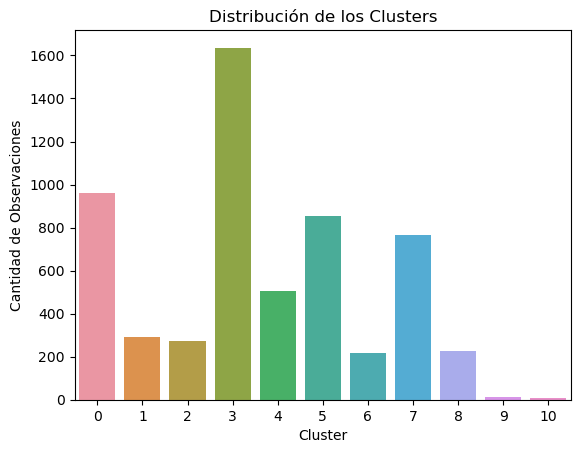

In [23]:
# Análisis de patrones en los clusters
# Visualización de los clusters
sns.countplot(x='Cluster', data=data_combinada)
plt.title('Distribución de los Clusters')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Observaciones')
plt.show()